In [417]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd

# Exploration

## Read JSON of pipeline data

In [55]:
df = pd.read_json('./info from WorkStep/candidate_funnel_2022_08.json')

In [56]:
df.shape

(40935, 15)

In [57]:
df['position_id'].nunique()

2670

In [58]:
df = df.fillna(0)

In [59]:
needs_ints = ['count_started', 'count_submitted', 'count_approved', 'count_reviewed',
       'count_expired', 'count_withdrawn', 'count_deactivated',
       'count_position_closed', 'count_invited_to_interview', 'count_hired']
df[needs_ints] = df[needs_ints].astype(int)

In [52]:
for col in needs_ints:
    df[col].apply(lambda x: int(x))

There are 40k+ entries in the dataset, but only 2670 positions.

Let's look at a sample position which was hired for, to see what the pipeline looks like

In [60]:
df8049247818 = df[(df['company_id'] == 69615) & (df['position_id'] == 8049247818)].head(50)

In [61]:
df8049247818

,company_id,position_role_type,position_id,date,spend,count_started,count_submitted,count_approved,count_reviewed,count_expired,count_withdrawn,count_deactivated,count_position_closed,count_invited_to_interview,count_hired
36,69615,WAREHOUSE,8049247818,2022-08-01 00:00:00+00:00,0.005527,2,1,1,0,0,0,0,0,0,0
37,69615,WAREHOUSE,8049247818,2022-08-02 00:00:00+00:00,0.005857,0,0,0,1,0,0,0,0,1,0
38,69615,WAREHOUSE,8049247818,2022-08-03 00:00:00+00:00,0.046157,1,1,1,0,0,0,0,0,0,0
39,69615,WAREHOUSE,8049247818,2022-08-08 00:00:00+00:00,0.011225,2,1,1,0,0,0,0,0,0,0
40,69615,WAREHOUSE,8049247818,2022-08-11 00:00:00+00:00,0.000549,1,1,1,3,0,0,0,0,3,0
41,69615,WAREHOUSE,8049247818,2022-08-12 00:00:00+00:00,0.008016,1,0,0,0,0,0,0,0,0,0
42,69615,WAREHOUSE,8049247818,2022-08-14 00:00:00+00:00,0.011640,1,2,2,0,0,0,0,0,0,0
43,69615,WAREHOUSE,8049247818,2022-08-15 00:00:00+00:00,0.023024,3,0,0,0,0,0,0,0,0,0
44,69615,WAREHOUSE,8049247818,2022-08-16 00:00:00+00:00,0.023866,1,1,1,2,0,0,0,0,1,0
45,69615,WAREHOUSE,8049247818,2022-08-18 00:00:00+00:00,0.004319,1,1,1,0,0,0,0,0,0,0


In [62]:
summable_cols = ['spend', 'count_started', 'count_submitted', 'count_approved', 'count_reviewed',
       'count_expired', 'count_withdrawn', 'count_deactivated',
       'count_position_closed', 'count_invited_to_interview', 'count_hired']

In [63]:
df8049247818[summable_cols].sum()

spend                          0.161117
count_started                 15.000000
count_submitted                9.000000
count_approved                 8.000000
count_reviewed                 8.000000
count_expired                  0.000000
count_withdrawn                0.000000
count_deactivated              0.000000
count_position_closed          0.000000
count_invited_to_interview     6.000000
count_hired                    1.000000
dtype: float64

According to this data:

* 15 people began applications
* 9 completed them
* 8 passed initial screening
* 8 were reviewed by the HM
* 6 invited to interview
* 1 hired

## Group by position ID

In [65]:
df_positions = df.groupby('position_id', as_index=False)[summable_cols].sum()
df_positions[df_positions['count_hired'] >= 1]

,position_id,spend,count_started,count_submitted,count_approved,count_reviewed,count_expired,count_withdrawn,count_deactivated,count_position_closed,count_invited_to_interview,count_hired
2,101331110,5.786332,797,496,381,381,0,0,0,0,185,1
3,101926072,0.041716,11,8,7,7,0,0,0,0,7,1
8,103393641,1.173819,226,169,126,126,0,0,0,0,126,1
10,103630930,0.139777,100,81,79,79,0,0,0,0,45,1
11,104081540,1.548433,294,181,148,111,36,0,0,1,64,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2651,9178975289,0.846082,176,131,99,99,0,0,0,0,99,1
2652,9194306483,0.872192,133,92,86,82,4,0,0,0,23,2
2654,9196561636,0.769348,57,33,26,21,5,0,0,0,18,1
2667,9905840884,0.788126,159,100,95,88,7,0,0,0,3,1


* Of the 2670 positions in the dataset, 2155 ended in no hire and only 515 ended with a hire!

In [71]:
df_positions['percent_submitted'] = round(df_positions['count_submitted'] / df_positions['count_started'] * 100.0, 2)
df_positions['percent_approved'] = round(df_positions['count_approved'] / df_positions['count_submitted'] * 100.0, 2)
df_positions['percent_reviewed'] = round(df_positions['count_reviewed'] / df_positions['count_approved'] * 100.0, 2)
df_positions['percent_interviewed'] = round(df_positions['count_invited_to_interview'] / df_positions['count_reviewed'] * 100.0, 2)
df_positions['percent_hired'] = round(df_positions['count_hired'] / df_positions['count_invited_to_interview'] * 100.0, 2)

In [72]:
df_positions

,position_id,spend,count_started,count_submitted,count_approved,count_reviewed,count_expired,count_withdrawn,count_deactivated,count_position_closed,count_invited_to_interview,count_hired,percent_submitted,percent_approved,percent_reviewed,percent_interviewed,percent_hired
0,100286000,0.595761,64,40,36,36,0,0,0,0,1,0,62.50,90.00,100.00,2.78,0.00
1,100778742,0.396039,41,27,15,5,10,0,0,0,5,0,65.85,55.56,33.33,100.00,0.00
2,101331110,5.786332,797,496,381,381,0,0,0,0,185,1,62.23,76.81,100.00,48.56,0.54
3,101926072,0.041716,11,8,7,7,0,0,0,0,7,1,72.73,87.50,100.00,100.00,14.29
4,101998387,0.690089,42,21,12,12,0,0,0,0,7,0,50.00,57.14,100.00,58.33,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,9696000534,0.074183,11,6,3,3,0,0,0,0,2,0,54.55,50.00,100.00,66.67,0.00
2666,9868359373,0.236643,27,21,18,18,0,0,0,0,4,0,77.78,85.71,100.00,22.22,0.00
2667,9905840884,0.788126,159,100,95,88,7,0,0,0,3,1,62.89,95.00,92.63,3.41,33.33
2668,9967558006,0.005686,3,3,3,3,0,0,0,0,3,0,100.00,100.00,100.00,100.00,0.00


# 1. Performance

## Group by company ID

In [75]:
df_gb_company = df.groupby('company_id', as_index=False)[summable_cols].sum()
df_gb_company['spend_per_hire_USD'] = df_gb_company['spend'] / df_gb_company['count_hired']
df_gb_company.sort_values(by='spend_per_hire_USD', inplace=True, ascending=True)

In [76]:
df_gb_company.head(10)

,company_id,spend,count_started,count_submitted,count_approved,count_reviewed,count_expired,count_withdrawn,count_deactivated,count_position_closed,count_invited_to_interview,count_hired,spend_per_hire_USD
80,217743,0.447858,78,57,42,42,0,0,0,0,8,3,0.149286
118,629687,14.589868,1796,1339,1124,1084,38,1,0,1,945,85,0.171646
5,14221,0.360912,92,71,62,57,1,0,0,4,52,2,0.180456
2,12155,0.995217,89,57,46,46,0,0,0,0,46,5,0.199043
12,20805,1.003038,218,170,145,136,2,0,0,7,51,5,0.200608
20,27712,4.752413,742,502,349,323,24,0,0,0,262,23,0.206627
102,431776,0.208275,17,9,8,8,0,0,0,0,7,1,0.208275
25,34548,4.421479,660,438,346,344,0,1,0,1,326,18,0.245638
91,329237,1.483486,128,66,54,54,0,0,0,0,45,6,0.247248
127,731460,0.254286,46,34,24,24,0,0,0,0,3,1,0.254286


In [81]:
opp_companies = df_gb_company[df_gb_company['count_hired'] > 0].sort_values(by='spend_per_hire_USD', ascending=False)
opp_companies.head(10)

,company_id,spend,count_started,count_submitted,count_approved,count_reviewed,count_expired,count_withdrawn,count_deactivated,count_position_closed,count_invited_to_interview,count_hired,spend_per_hire_USD
39,54042,12.626533,1769,1034,621,607,14,0,0,0,124,1,12.626533
97,403553,27.676070,5543,3940,3189,2762,74,1,0,352,599,6,4.612678
92,346676,3.980185,352,210,134,96,37,1,0,0,21,1,3.980185
54,73394,3.732378,932,694,561,345,216,0,0,0,33,1,3.732378
140,868835,3.561146,571,324,198,51,115,0,0,32,32,1,3.561146
98,407848,3.268647,459,278,139,123,14,0,0,1,20,1,3.268647
45,58946,6.225625,642,415,329,213,115,0,0,0,175,2,3.112813
106,468091,6.089142,688,446,277,267,8,1,0,0,124,2,3.044571
29,41679,64.157676,7809,5186,3962,3961,0,0,0,1,3922,24,2.673237
108,498096,7.632267,1472,1016,630,613,17,0,0,0,39,3,2.544089


## Group by role type

In [82]:
df_gb_role = df.groupby('position_role_type', as_index=False)[summable_cols].sum()
df_gb_role['spend_per_hire_USD'] = df_gb_role['spend'] / df_gb_role['count_hired']
df_gb_role.sort_values(by='spend_per_hire_USD', inplace=True, ascending=True)

In [85]:
df_gb_role

,position_role_type,spend,count_started,count_submitted,count_approved,count_reviewed,count_expired,count_withdrawn,count_deactivated,count_position_closed,count_invited_to_interview,count_hired,spend_per_hire_USD
4,WAREHOUSE,468.640259,67721,45187,33486,28802,3851,9,0,805,20681,599,0.782371
1,PRODUCTION,356.856526,51065,34304,25994,24201,1614,9,0,143,11175,379,0.941574
3,TRUCKING,49.192608,4789,2977,1792,1586,127,0,0,77,1112,39,1.261349
0,0,11.481912,1269,653,463,397,51,0,0,15,291,8,1.435239
2,SKILLED_TRADE,84.032345,12726,8272,5280,4166,976,1,0,133,2359,47,1.787922


## Group by position ID

In [86]:
df_gb_position = df.groupby('position_id', as_index=False)[summable_cols].sum()
df_gb_position['spend_per_hire_USD'] = df_gb_position['spend'] / df_gb_position['count_hired']
df_gb_position.sort_values(by='spend_per_hire_USD', inplace=True, ascending=True)

In [88]:
df_gb_position.head(15)

,position_id,spend,count_started,count_submitted,count_approved,count_reviewed,count_expired,count_withdrawn,count_deactivated,count_position_closed,count_invited_to_interview,count_hired,spend_per_hire_USD
592,488966091,0.000000,78,58,42,42,0,0,0,0,42,1,0.000000
111,177912400,0.000000,18,18,10,6,4,0,0,0,6,1,0.000000
1025,738751122,0.000000,91,64,60,37,23,0,0,0,9,1,0.000000
1220,876731926,0.000000,14,13,8,7,0,0,0,1,7,2,0.000000
1146,827810278,0.002867,4,4,3,3,0,0,0,0,1,1,0.002867
2449,8110372407,0.003563,8,8,1,1,0,0,0,0,1,1,0.003563
1899,4924271866,0.005698,4,2,2,2,0,0,0,0,2,1,0.005698
1039,750076923,0.005991,9,8,8,8,0,0,0,0,8,1,0.005991
2621,8977141655,0.007150,8,5,5,5,0,0,0,0,3,1,0.007150
2552,8635943435,0.009663,13,10,2,2,0,0,0,0,2,1,0.009663


In [89]:
opp_positions = df_gb_position[df_gb_position['count_hired'] > 0].sort_values(by='spend_per_hire_USD', ascending=False)
opp_positions.head(10)

,position_id,spend,count_started,count_submitted,count_approved,count_reviewed,count_expired,count_withdrawn,count_deactivated,count_position_closed,count_invited_to_interview,count_hired,spend_per_hire_USD
509,435844256,10.037665,1608,950,569,569,0,0,0,0,92,1,10.037665
2186,6597822567,6.452104,1316,896,562,562,0,0,0,0,28,1,6.452104
920,684704823,6.289511,1294,784,682,679,0,0,0,0,46,1,6.289511
233,259119508,6.109201,854,561,455,455,0,0,0,0,254,1,6.109201
885,664024157,11.655962,1193,612,357,313,43,0,0,0,162,2,5.827981
2,101331110,5.786332,797,496,381,381,0,0,0,0,185,1,5.786332
1745,3936036304,5.688405,688,386,336,336,0,0,0,0,336,1,5.688405
1398,1472052002,4.808002,700,532,408,408,0,0,0,0,406,1,4.808002
1763,4026791137,4.026379,639,391,143,143,0,0,0,0,24,1,4.026379
1089,789507482,3.843678,270,136,27,26,0,0,0,0,23,1,3.843678


## Successes:

### Companies:

Company ID (\$ spent per hire)

1) 217743 (\$ 0.149286)
2) 629687 (\$ 0.171646)
3) 14221 (\$ 0.180456)
4) 12155 (\$ 0.199043)
5) 20805 (\$ 0.200608)
6) 27712 (\$ 0.206627)
7) 431776 (\$ 0.208275)

In [126]:
top_5_company_ids = [
    217743, 629687, 14221, 12155, 20805
]

### Role types:

Type (\$ spent per hire)

1) WAREHOUSE (\$ 0.782371)
2) PRODUCTION (\$ 0.941574)

### Positions:

Position ID (\$ spent per hire)

1) 488966091 (\$ 0.000000)
2) 177912400 (\$ 0.000000)
3) 738751122 (\$ 0.000000)
4) 876731926 (\$ 0.000000)
5) 827810278 (\$ 0.002867)
6) 8110372407 (\$ 0.003563)
7) 4924271866 (\$ 0.005698)
8) 750076923 (\$ 0.005991)
9) 8977141655 (\$ 0.007150)
10) 8635943435 (\$ 0.009663)

In [125]:
top_5_position_ids = [
    488966091, 177912400, 738751122, 876731926, 827810278
]

## Opportunities to improve:

### Companies:

Company ID (\$ spent per hire)

1) 54042 (\$ 12.626533)
2) 403553 (\$ 4.612678)
3) 346676 (\$ 3.980185)
4) 73394 (\$ 3.732378)
5) 868835 (\$ 3.561146)
6) 407848 (\$ 3.268647)
7) 58946 (\$ 3.112813)
8) 468091 (\$ 3.044571)

In [136]:
bottom_5_company_ids = [
    54042, 403553, 346676, 73394, 868835
]

### Role types:

Type (\$ spent per hire)

1) SKILLED_TRADE (\$ 1.787922)
2) TRUCKING (\$ 1.261349)

### Positions:

Position ID (\$ spent per hire)

1) 435844256 (\$ 10.037665)
2) 6597822567 (\$ 6.452104)
3) 684704823 (\$ 6.289511)
4) 259119508 (\$ 6.109201)
5) 664024157 (\$ 5.827981)
6) 101331110 (\$ 5.786332)
7) 3936036304 (\$ 5.688405)

In [135]:
bottom_5_position_ids = [
    435844256, 6597822567, 684704823, 259119508, 664024157
]

# 2. Capital spent on no-hires

In [90]:
df_no_hire = df[df['count_hired'] == 0]
df_no_hire

,company_id,position_role_type,position_id,date,spend,count_started,count_submitted,count_approved,count_reviewed,count_expired,count_withdrawn,count_deactivated,count_position_closed,count_invited_to_interview,count_hired
0,75621,PRODUCTION,134935318,2022-08-04 00:00:00+00:00,0.000000,1,0,0,0,0,0,0,0,0,0
1,75621,PRODUCTION,3102362893,2022-08-04 00:00:00+00:00,0.003965,1,1,1,0,0,0,0,0,0,0
2,75621,PRODUCTION,3102362893,2022-08-15 00:00:00+00:00,0.000000,0,0,0,0,1,0,0,0,0,0
3,75621,PRODUCTION,7797193831,2022-08-02 00:00:00+00:00,0.000000,2,2,2,0,0,0,0,0,0,0
4,75621,PRODUCTION,7797193831,2022-08-12 00:00:00+00:00,0.000000,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40929,18738,WAREHOUSE,200792455,2022-08-10 00:00:00+00:00,0.032345,6,7,6,6,0,0,0,0,6,0
40930,18738,WAREHOUSE,200792455,2022-08-11 00:00:00+00:00,0.040191,3,3,3,3,0,0,0,0,3,0
40931,18738,WAREHOUSE,200792455,2022-08-12 00:00:00+00:00,0.046853,2,2,0,1,0,0,0,0,0,0
40932,18738,WAREHOUSE,200792455,2022-08-13 00:00:00+00:00,0.044107,1,1,1,1,0,0,0,0,1,0


In [93]:
df_no_hire_gb_position = df_no_hire.groupby('position_id', as_index=False)['spend'].sum()
total_spend_no_hire = df_no_hire_gb_position['spend'].sum()
average_spend_no_hire = df_no_hire_gb_position['spend'].mean()

In [94]:
total_spend_no_hire

950.930928866

In [95]:
average_spend_no_hire

0.35615390594232177

## Spend on no-hires

### Total for month:

\$ 950.931

### Average per role

\$ 0.356

In [163]:
df_yes_hire = df[df['count_hired'] > 0]
df_yes_hire

,company_id,position_role_type,position_id,date,spend,count_started,count_submitted,count_approved,count_reviewed,count_expired,count_withdrawn,count_deactivated,count_position_closed,count_invited_to_interview,count_hired
48,69615,WAREHOUSE,8049247818,2022-08-29 00:00:00+00:00,0.00000,0,0,0,0,0,0,0,0,0,1
199,69615,PRODUCTION,7146444165,2022-08-23 00:00:00+00:00,0.00000,0,0,0,0,0,0,0,0,0,1
200,69615,PRODUCTION,7146444165,2022-09-06 00:00:00+00:00,0.00000,0,0,0,0,0,0,0,0,0,1
206,69615,PRODUCTION,2146517508,2022-08-23 00:00:00+00:00,0.04983,1,1,1,1,0,0,0,0,1,1
207,69615,PRODUCTION,2146517508,2022-09-06 00:00:00+00:00,0.00000,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40734,224737,WAREHOUSE,363662039,2022-09-19 00:00:00+00:00,0.00000,0,0,0,0,0,0,0,0,0,2
40873,224737,PRODUCTION,725322262,2022-09-20 00:00:00+00:00,0.00000,0,0,0,0,0,0,0,0,0,1
40907,43117,PRODUCTION,2513728158,2022-08-15 00:00:00+00:00,0.00000,0,0,0,0,0,0,0,0,0,1
40911,43117,PRODUCTION,2513728158,2022-08-22 00:00:00+00:00,0.00000,1,2,0,0,0,0,0,0,0,1


In [164]:
df_yes_hire_gb_position = df_yes_hire.groupby('position_id', as_index=False)['spend'].sum()
total_spend_yes_hire = df_yes_hire_gb_position['spend'].sum()
average_spend_yes_hire = df_yes_hire_gb_position['spend'].mean()

In [165]:
total_spend_yes_hire

19.272721726300002

In [166]:
average_spend_yes_hire

0.037422760633592234

# 3. Funnel dynamics

In [101]:
df

,company_id,position_role_type,position_id,date,spend,count_started,count_submitted,count_approved,count_reviewed,count_expired,count_withdrawn,count_deactivated,count_position_closed,count_invited_to_interview,count_hired
0,75621,PRODUCTION,134935318,2022-08-04 00:00:00+00:00,0.000000,1,0,0,0,0,0,0,0,0,0
1,75621,PRODUCTION,3102362893,2022-08-04 00:00:00+00:00,0.003965,1,1,1,0,0,0,0,0,0,0
2,75621,PRODUCTION,3102362893,2022-08-15 00:00:00+00:00,0.000000,0,0,0,0,1,0,0,0,0,0
3,75621,PRODUCTION,7797193831,2022-08-02 00:00:00+00:00,0.000000,2,2,2,0,0,0,0,0,0,0
4,75621,PRODUCTION,7797193831,2022-08-12 00:00:00+00:00,0.000000,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40930,18738,WAREHOUSE,200792455,2022-08-11 00:00:00+00:00,0.040191,3,3,3,3,0,0,0,0,3,0
40931,18738,WAREHOUSE,200792455,2022-08-12 00:00:00+00:00,0.046853,2,2,0,1,0,0,0,0,0,0
40932,18738,WAREHOUSE,200792455,2022-08-13 00:00:00+00:00,0.044107,1,1,1,1,0,0,0,0,1,0
40933,18738,WAREHOUSE,200792455,2022-08-14 00:00:00+00:00,0.044046,7,5,4,1,0,0,0,0,1,0


## Compare application expiration rates

### by position ID

In [114]:
df_gb_position = df.groupby('position_id', as_index=False)[summable_cols].sum()

In [115]:
df_gb_position

,position_id,spend,count_started,count_submitted,count_approved,count_reviewed,count_expired,count_withdrawn,count_deactivated,count_position_closed,count_invited_to_interview,count_hired
0,100286000,0.595761,64,40,36,36,0,0,0,0,1,0
1,100778742,0.396039,41,27,15,5,10,0,0,0,5,0
2,101331110,5.786332,797,496,381,381,0,0,0,0,185,1
3,101926072,0.041716,11,8,7,7,0,0,0,0,7,1
4,101998387,0.690089,42,21,12,12,0,0,0,0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2665,9696000534,0.074183,11,6,3,3,0,0,0,0,2,0
2666,9868359373,0.236643,27,21,18,18,0,0,0,0,4,0
2667,9905840884,0.788126,159,100,95,88,7,0,0,0,3,1
2668,9967558006,0.005686,3,3,3,3,0,0,0,0,3,0


In [117]:
df_expirations = df_gb_position.loc[:, ['position_id', 'count_approved', 'count_expired', 'count_position_closed', 'count_hired', 'spend']]
df_expirations['percent_expired'] = df_expirations['count_expired'] / df_expirations['count_approved'] * 100.0
df_expirations.sort_values('percent_expired', inplace=True, ascending=False)

In [154]:
df_expirations[(df_expirations['percent_expired'].between(50, 100, inclusive='neither')) & (df_expirations['count_hired'] == 0) & (df_expirations['count_position_closed'] == 0) & (df_expirations['count_approved'] > 0)]
# This filters for positions which had approved applications, were not closed, had applications expire, and yet no hire was made)

,position_id,count_approved,count_expired,count_position_closed,count_hired,spend,percent_expired
988,715408768,25,24,0,0,0.149843,96.000000
870,652185488,21,20,0,0,0.578826,95.238095
494,420528626,14,13,0,0,0.383667,92.857143
2602,8886228410,13,12,0,0,0.199283,92.307692
898,673788967,39,36,0,0,0.345417,92.307692
...,...,...,...,...,...,...,...
1087,787869918,17,9,0,0,0.437243,52.941176
2201,6740934354,23,12,0,0,0.167584,52.173913
298,305498553,35,18,0,0,0.733940,51.428571
1966,5362240788,39,20,0,0,0.571444,51.282051


* 229 positions had approved applicants, were not canceled, and yet had a 100% expiration rate

* 132 positions had approved applicants, were not canceled, did not lead to a hire, and yet had an expiration rate between 50 and 100%

In [134]:
df_expirations[df_expirations['position_id'].isin(top_5_position_ids)]

,position_id,count_approved,count_expired,count_position_closed,count_hired,spend,percent_expired
111,177912400,10,4,0,1,0.000000,40.000000
1025,738751122,60,23,0,1,0.000000,38.333333
592,488966091,42,0,0,1,0.000000,0.000000
1146,827810278,3,0,0,1,0.002867,0.000000
1220,876731926,8,0,1,2,0.000000,0.000000


In [133]:
df_expirations[df_expirations['position_id'].isin(top_5_position_ids)]['percent_expired'].mean()

15.666666666666668

* The top-performing 5 positions had a mean expiration percentage of 15.7%...interesting!

* Two of them had percentages of 38.3% and 40%

In [137]:
df_expirations[df_expirations['position_id'].isin(bottom_5_position_ids)]

,position_id,count_approved,count_expired,count_position_closed,count_hired,spend,percent_expired
885,664024157,357,43,0,2,11.655962,12.044818
2186,6597822567,562,0,0,1,6.452104,0.000000
509,435844256,569,0,0,1,10.037665,0.000000
233,259119508,455,0,0,1,6.109201,0.000000
920,684704823,682,0,0,1,6.289511,0.000000


In [138]:
df_expirations[df_expirations['position_id'].isin(bottom_5_position_ids)]['percent_expired'].mean()

2.4089635854341735

* It would take a bit of statistical analysis to be more certain, but it seems there is not a correlation between expiration percentage and efficient spend

### by company ID

In [139]:
df_gb_company = df.groupby('company_id', as_index=False)[summable_cols].sum()

In [140]:
df_gb_company

,company_id,spend,count_started,count_submitted,count_approved,count_reviewed,count_expired,count_withdrawn,count_deactivated,count_position_closed,count_invited_to_interview,count_hired
0,11405,19.257995,2606,1694,1154,1086,59,1,0,7,371,10
1,11767,0.955392,301,212,130,113,17,0,0,0,113,1
2,12155,0.995217,89,57,46,46,0,0,0,0,46,5
3,13213,0.303579,57,36,18,15,1,0,0,2,9,1
4,13243,0.063154,5,3,3,3,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
141,875301,0.432265,38,29,22,21,1,0,0,0,12,0
142,884196,1.426665,157,90,61,61,0,0,0,0,36,1
143,913406,6.058017,839,578,432,414,15,1,0,1,219,9
144,916768,3.030271,555,396,355,206,148,1,0,0,69,0


In [143]:
df_company_expirations = df_gb_company.loc[:, ['company_id', 'count_approved', 'count_expired', 'count_position_closed', 'count_hired', 'spend']]
df_company_expirations['percent_expired'] = df_company_expirations['count_expired'] / df_company_expirations['count_approved'] * 100.0
df_company_expirations.sort_values('percent_expired', inplace=True, ascending=False)

In [148]:
df_company_expirations[(df_company_expirations['percent_expired'].between(50, 100, inclusive='right')) & (df_company_expirations['count_hired'] == 0) & (df_company_expirations['count_position_closed'] == 0) & (df_company_expirations['count_approved'] > 0)]

,company_id,count_approved,count_expired,count_position_closed,count_hired,spend,percent_expired
88,294124,1,1,0,0,0.006747,100.000000
113,551504,8,8,0,0,0.032321,100.000000
86,275870,1,1,0,0,0.000049,100.000000
93,365654,18,18,0,0,0.000000,100.000000
57,75621,5,5,0,0,0.006113,100.000000
83,227455,12,12,0,0,0.259105,100.000000
41,54578,3,3,0,0,0.026953,100.000000
74,114903,35,32,0,0,0.360034,91.428571
24,34197,7,6,0,0,0.033480,85.714286


* of the 146 companies in the database, 9 showed opportunity for growth, with an expiration rate above 85% for positions where no hire was made (no other company was above 50%)

In [155]:
df_company_expirations[(df_company_expirations['percent_expired'].between(50, 100, inclusive='right')) & (df_company_expirations['count_position_closed'] == 0) & (df_company_expirations['count_approved'] > 0)]

,company_id,count_approved,count_expired,count_position_closed,count_hired,spend,percent_expired
88,294124,1,1,0,0,0.006747,100.000000
113,551504,8,8,0,0,0.032321,100.000000
86,275870,1,1,0,0,0.000049,100.000000
93,365654,18,18,0,0,0.000000,100.000000
57,75621,5,5,0,0,0.006113,100.000000
83,227455,12,12,0,0,0.259105,100.000000
41,54578,3,3,0,0,0.026953,100.000000
74,114903,35,32,0,0,0.360034,91.428571
24,34197,7,6,0,0,0.033480,85.714286
62,78030,76,64,0,1,0.955295,84.210526


* 3 others may be added to the "growth opportunity" pile when considering high expiration rates despite having made hires

In [149]:
df_company_expirations[df_company_expirations['company_id'].isin(top_5_company_ids)]

,company_id,count_approved,count_expired,count_position_closed,count_hired,spend,percent_expired
118,629687,1124,38,1,85,14.589868,3.380783
5,14221,62,1,4,2,0.360912,1.612903
12,20805,145,2,7,5,1.003038,1.379310
2,12155,46,0,0,5,0.995217,0.000000
80,217743,42,0,0,3,0.447858,0.000000


In [151]:
df_company_expirations[df_company_expirations['company_id'].isin(top_5_company_ids)]['percent_expired'].mean()

1.2745992977567009

* The top-performing 5 companies had an average expiration rate of only 1.275%

* Several did have positions they closed, however

In [152]:
df_company_expirations[df_company_expirations['company_id'].isin(bottom_5_company_ids)]

,company_id,count_approved,count_expired,count_position_closed,count_hired,spend,percent_expired
140,868835,198,115,32,1,3.561146,58.080808
54,73394,561,216,0,1,3.732378,38.502674
92,346676,134,37,0,1,3.980185,27.611940
97,403553,3189,74,352,6,27.676070,2.320477
39,54042,621,14,0,1,12.626533,2.254428


In [153]:
df_company_expirations[df_company_expirations['company_id'].isin(bottom_5_company_ids)]['percent_expired'].mean()

25.754065431187303

* Of the bottom-performing 5 companies, 3 allowed an expiration rate higher than 25%

* The average for those 5 is 25.75%

### by role type

In [156]:
df_gb_role = df.groupby('position_role_type', as_index=False)[summable_cols].sum()

In [158]:
df_gb_role = df_gb_role.drop(0)

In [159]:
df_gb_role

,position_role_type,spend,count_started,count_submitted,count_approved,count_reviewed,count_expired,count_withdrawn,count_deactivated,count_position_closed,count_invited_to_interview,count_hired
1,PRODUCTION,356.856526,51065,34304,25994,24201,1614,9,0,143,11175,379
2,SKILLED_TRADE,84.032345,12726,8272,5280,4166,976,1,0,133,2359,47
3,TRUCKING,49.192608,4789,2977,1792,1586,127,0,0,77,1112,39
4,WAREHOUSE,468.640259,67721,45187,33486,28802,3851,9,0,805,20681,599


In [160]:
df_role_expirations = df_gb_role.loc[:, ['position_role_type', 'count_approved', 'count_expired', 'count_position_closed', 'count_hired', 'spend']]
df_role_expirations['percent_expired'] = df_role_expirations['count_expired'] / df_role_expirations['count_approved'] * 100.0
df_role_expirations.sort_values('percent_expired', inplace=True, ascending=False)

In [162]:
df_role_expirations

,position_role_type,count_approved,count_expired,count_position_closed,count_hired,spend,percent_expired
2,SKILLED_TRADE,5280,976,133,47,84.032345,18.484848
4,WAREHOUSE,33486,3851,805,599,468.640259,11.500328
3,TRUCKING,1792,127,77,39,49.192608,7.087054
1,PRODUCTION,25994,1614,143,379,356.856526,6.209125


* roles classified as "skilled trades" are an area to address strategically, as they are the most expensive to hire and have the highest expiration rate

In [155]:
df_company_expirations[(df_company_expirations['percent_expired'].between(50, 100, inclusive='right')) & (df_company_expirations['count_position_closed'] == 0) & (df_company_expirations['count_approved'] > 0)]

,company_id,count_approved,count_expired,count_position_closed,count_hired,spend,percent_expired
88,294124,1,1,0,0,0.006747,100.000000
113,551504,8,8,0,0,0.032321,100.000000
86,275870,1,1,0,0,0.000049,100.000000
93,365654,18,18,0,0,0.000000,100.000000
57,75621,5,5,0,0,0.006113,100.000000
83,227455,12,12,0,0,0.259105,100.000000
41,54578,3,3,0,0,0.026953,100.000000
74,114903,35,32,0,0,0.360034,91.428571
24,34197,7,6,0,0,0.033480,85.714286
62,78030,76,64,0,1,0.955295,84.210526


* 3 others may be added to the "growth opportunity" pile when considering high expiration rates despite having made hires

In [149]:
df_company_expirations[df_company_expirations['company_id'].isin(top_5_company_ids)]

,company_id,count_approved,count_expired,count_position_closed,count_hired,spend,percent_expired
118,629687,1124,38,1,85,14.589868,3.380783
5,14221,62,1,4,2,0.360912,1.612903
12,20805,145,2,7,5,1.003038,1.379310
2,12155,46,0,0,5,0.995217,0.000000
80,217743,42,0,0,3,0.447858,0.000000


In [151]:
df_company_expirations[df_company_expirations['company_id'].isin(top_5_company_ids)]['percent_expired'].mean()

1.2745992977567009

* The top-performing 5 companies had an average expiration rate of only 1.275%

* Several did have positions they closed, however

In [152]:
df_company_expirations[df_company_expirations['company_id'].isin(bottom_5_company_ids)]

,company_id,count_approved,count_expired,count_position_closed,count_hired,spend,percent_expired
140,868835,198,115,32,1,3.561146,58.080808
54,73394,561,216,0,1,3.732378,38.502674
92,346676,134,37,0,1,3.980185,27.611940
97,403553,3189,74,352,6,27.676070,2.320477
39,54042,621,14,0,1,12.626533,2.254428


In [153]:
df_company_expirations[df_company_expirations['company_id'].isin(bottom_5_company_ids)]['percent_expired'].mean()

25.754065431187303

* Of the bottom-performing 5 companies, 3 allowed an expiration rate higher than 25%

* The average for those 5 is 25.75%

## Consider timeline

In [167]:
df_hired = df.loc[df['count_hired'] > 0]
df_hired

,company_id,position_role_type,position_id,date,spend,count_started,count_submitted,count_approved,count_reviewed,count_expired,count_withdrawn,count_deactivated,count_position_closed,count_invited_to_interview,count_hired
48,69615,WAREHOUSE,8049247818,2022-08-29 00:00:00+00:00,0.00000,0,0,0,0,0,0,0,0,0,1
199,69615,PRODUCTION,7146444165,2022-08-23 00:00:00+00:00,0.00000,0,0,0,0,0,0,0,0,0,1
200,69615,PRODUCTION,7146444165,2022-09-06 00:00:00+00:00,0.00000,0,0,0,0,0,0,0,0,0,1
206,69615,PRODUCTION,2146517508,2022-08-23 00:00:00+00:00,0.04983,1,1,1,1,0,0,0,0,1,1
207,69615,PRODUCTION,2146517508,2022-09-06 00:00:00+00:00,0.00000,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40734,224737,WAREHOUSE,363662039,2022-09-19 00:00:00+00:00,0.00000,0,0,0,0,0,0,0,0,0,2
40873,224737,PRODUCTION,725322262,2022-09-20 00:00:00+00:00,0.00000,0,0,0,0,0,0,0,0,0,1
40907,43117,PRODUCTION,2513728158,2022-08-15 00:00:00+00:00,0.00000,0,0,0,0,0,0,0,0,0,1
40911,43117,PRODUCTION,2513728158,2022-08-22 00:00:00+00:00,0.00000,1,2,0,0,0,0,0,0,0,1


In [177]:
hired_ids = list(df_hired['position_id'].unique())

In [178]:
df[df['position_id'].isin(hired_ids)]

,company_id,position_role_type,position_id,date,spend,count_started,count_submitted,count_approved,count_reviewed,count_expired,count_withdrawn,count_deactivated,count_position_closed,count_invited_to_interview,count_hired
36,69615,WAREHOUSE,8049247818,2022-08-01 00:00:00+00:00,0.005527,2,1,1,0,0,0,0,0,0,0
37,69615,WAREHOUSE,8049247818,2022-08-02 00:00:00+00:00,0.005857,0,0,0,1,0,0,0,0,1,0
38,69615,WAREHOUSE,8049247818,2022-08-03 00:00:00+00:00,0.046157,1,1,1,0,0,0,0,0,0,0
39,69615,WAREHOUSE,8049247818,2022-08-08 00:00:00+00:00,0.011225,2,1,1,0,0,0,0,0,0,0
40,69615,WAREHOUSE,8049247818,2022-08-11 00:00:00+00:00,0.000549,1,1,1,3,0,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40930,18738,WAREHOUSE,200792455,2022-08-11 00:00:00+00:00,0.040191,3,3,3,3,0,0,0,0,3,0
40931,18738,WAREHOUSE,200792455,2022-08-12 00:00:00+00:00,0.046853,2,2,0,1,0,0,0,0,0,0
40932,18738,WAREHOUSE,200792455,2022-08-13 00:00:00+00:00,0.044107,1,1,1,1,0,0,0,0,1,0
40933,18738,WAREHOUSE,200792455,2022-08-14 00:00:00+00:00,0.044046,7,5,4,1,0,0,0,0,1,0


In [318]:
test_df = df[df['position_id'] == 8049247818]
test_df.reset_index(inplace=True, drop=True)
test_df

,company_id,position_role_type,position_id,date,spend,count_started,count_submitted,count_approved,count_reviewed,count_expired,count_withdrawn,count_deactivated,count_position_closed,count_invited_to_interview,count_hired,backlog
0,69615,WAREHOUSE,8049247818,2022-08-01 00:00:00+00:00,0.005527,2,1,1,0,0,0,0,0,0,0,1.0
1,69615,WAREHOUSE,8049247818,2022-08-02 00:00:00+00:00,0.005857,0,0,0,1,0,0,0,0,1,0,NaN
2,69615,WAREHOUSE,8049247818,2022-08-03 00:00:00+00:00,0.046157,1,1,1,0,0,0,0,0,0,0,NaN
3,69615,WAREHOUSE,8049247818,2022-08-08 00:00:00+00:00,0.011225,2,1,1,0,0,0,0,0,0,0,NaN
4,69615,WAREHOUSE,8049247818,2022-08-11 00:00:00+00:00,0.000549,1,1,1,3,0,0,0,0,3,0,NaN
5,69615,WAREHOUSE,8049247818,2022-08-12 00:00:00+00:00,0.008016,1,0,0,0,0,0,0,0,0,0,NaN
6,69615,WAREHOUSE,8049247818,2022-08-14 00:00:00+00:00,0.011640,1,2,2,0,0,0,0,0,0,0,NaN
7,69615,WAREHOUSE,8049247818,2022-08-15 00:00:00+00:00,0.023024,3,0,0,0,0,0,0,0,0,0,NaN
8,69615,WAREHOUSE,8049247818,2022-08-16 00:00:00+00:00,0.023866,1,1,1,2,0,0,0,0,1,0,NaN
9,69615,WAREHOUSE,8049247818,2022-08-18 00:00:00+00:00,0.004319,1,1,1,0,0,0,0,0,0,0,NaN


In [319]:
value = test_df.loc[0, 'count_approved'] - test_df.loc[0, 'count_reviewed']
test_df.loc[0, 'backlog'] = int(value)
test_df

,company_id,position_role_type,position_id,date,spend,count_started,count_submitted,count_approved,count_reviewed,count_expired,count_withdrawn,count_deactivated,count_position_closed,count_invited_to_interview,count_hired,backlog
0,69615,WAREHOUSE,8049247818,2022-08-01 00:00:00+00:00,0.005527,2,1,1,0,0,0,0,0,0,0,1.0
1,69615,WAREHOUSE,8049247818,2022-08-02 00:00:00+00:00,0.005857,0,0,0,1,0,0,0,0,1,0,NaN
2,69615,WAREHOUSE,8049247818,2022-08-03 00:00:00+00:00,0.046157,1,1,1,0,0,0,0,0,0,0,NaN
3,69615,WAREHOUSE,8049247818,2022-08-08 00:00:00+00:00,0.011225,2,1,1,0,0,0,0,0,0,0,NaN
4,69615,WAREHOUSE,8049247818,2022-08-11 00:00:00+00:00,0.000549,1,1,1,3,0,0,0,0,3,0,NaN
5,69615,WAREHOUSE,8049247818,2022-08-12 00:00:00+00:00,0.008016,1,0,0,0,0,0,0,0,0,0,NaN
6,69615,WAREHOUSE,8049247818,2022-08-14 00:00:00+00:00,0.011640,1,2,2,0,0,0,0,0,0,0,NaN
7,69615,WAREHOUSE,8049247818,2022-08-15 00:00:00+00:00,0.023024,3,0,0,0,0,0,0,0,0,0,NaN
8,69615,WAREHOUSE,8049247818,2022-08-16 00:00:00+00:00,0.023866,1,1,1,2,0,0,0,0,1,0,NaN
9,69615,WAREHOUSE,8049247818,2022-08-18 00:00:00+00:00,0.004319,1,1,1,0,0,0,0,0,0,0,NaN


In [206]:
len(test_df)

13

In [320]:
for i in range(1, len(test_df)):
    current_backlog = test_df.loc[i-1, 'backlog']
    new_backlog = current_backlog - test_df.loc[i, 'count_reviewed'] - test_df.loc[i, 'count_expired'] - test_df.loc[i, 'count_withdrawn'] - test_df.loc[i, 'count_deactivated'] - test_df.loc[i, 'count_position_closed'] + test_df.loc[i, 'count_approved']
    test_df.loc[i, 'backlog'] = new_backlog

In [321]:
test_df

,company_id,position_role_type,position_id,date,spend,count_started,count_submitted,count_approved,count_reviewed,count_expired,count_withdrawn,count_deactivated,count_position_closed,count_invited_to_interview,count_hired,backlog
0,69615,WAREHOUSE,8049247818,2022-08-01 00:00:00+00:00,0.005527,2,1,1,0,0,0,0,0,0,0,1.0
1,69615,WAREHOUSE,8049247818,2022-08-02 00:00:00+00:00,0.005857,0,0,0,1,0,0,0,0,1,0,0.0
2,69615,WAREHOUSE,8049247818,2022-08-03 00:00:00+00:00,0.046157,1,1,1,0,0,0,0,0,0,0,1.0
3,69615,WAREHOUSE,8049247818,2022-08-08 00:00:00+00:00,0.011225,2,1,1,0,0,0,0,0,0,0,2.0
4,69615,WAREHOUSE,8049247818,2022-08-11 00:00:00+00:00,0.000549,1,1,1,3,0,0,0,0,3,0,0.0
5,69615,WAREHOUSE,8049247818,2022-08-12 00:00:00+00:00,0.008016,1,0,0,0,0,0,0,0,0,0,0.0
6,69615,WAREHOUSE,8049247818,2022-08-14 00:00:00+00:00,0.011640,1,2,2,0,0,0,0,0,0,0,2.0
7,69615,WAREHOUSE,8049247818,2022-08-15 00:00:00+00:00,0.023024,3,0,0,0,0,0,0,0,0,0,2.0
8,69615,WAREHOUSE,8049247818,2022-08-16 00:00:00+00:00,0.023866,1,1,1,2,0,0,0,0,1,0,1.0
9,69615,WAREHOUSE,8049247818,2022-08-18 00:00:00+00:00,0.004319,1,1,1,0,0,0,0,0,0,0,2.0


In [243]:
last_backlog_index = 0
for i in range(1, len(test_df)):
    if test_df.loc[i, 'backlog'] > 0 and (test_df.loc[i-1, 'backlog'] == 0):
        last_backlog_index = i
        test_df.loc[i, 'time_to_clear'] = 0
        continue
    elif test_df.loc[i, 'backlog'] > 0 and (test_df.loc[i-1, 'backlog'] > 0):
        test_df.loc[i, 'time_to_clear'] = 0
        continue
    else:
        if test_df.loc[i-1, 'backlog'] == 0:
            test_df.loc[i, 'time_to_clear'] = 0
            last_backlog_index = i
            continue
        else:
            delta = test_df.loc[i, 'date'].day - test_df.loc[last_backlog_index, 'date'].day
            test_df.loc[i, 'time_to_clear'] = delta

In [290]:
test_df

,company_id,position_role_type,position_id,date,spend,count_started,count_submitted,count_approved,count_reviewed,count_expired,count_withdrawn,count_deactivated,count_position_closed,count_invited_to_interview,count_hired,backlog,time_to_clear
0,69615,WAREHOUSE,8049247818,2022-08-01 00:00:00+00:00,0.005527,2,1,1,0,0,0,0,0,0,0,1.0,NaN
1,69615,WAREHOUSE,8049247818,2022-08-02 00:00:00+00:00,0.005857,0,0,0,1,0,0,0,0,1,0,0.0,1.0
2,69615,WAREHOUSE,8049247818,2022-08-03 00:00:00+00:00,0.046157,1,1,1,0,0,0,0,0,0,0,1.0,0.0
3,69615,WAREHOUSE,8049247818,2022-08-08 00:00:00+00:00,0.011225,2,1,1,0,0,0,0,0,0,0,2.0,0.0
4,69615,WAREHOUSE,8049247818,2022-08-11 00:00:00+00:00,0.000549,1,1,1,3,0,0,0,0,3,0,0.0,8.0
5,69615,WAREHOUSE,8049247818,2022-08-12 00:00:00+00:00,0.008016,1,0,0,0,0,0,0,0,0,0,0.0,0.0
6,69615,WAREHOUSE,8049247818,2022-08-14 00:00:00+00:00,0.011640,1,2,2,0,0,0,0,0,0,0,2.0,0.0
7,69615,WAREHOUSE,8049247818,2022-08-15 00:00:00+00:00,0.023024,3,0,0,0,0,0,0,0,0,0,2.0,0.0
8,69615,WAREHOUSE,8049247818,2022-08-16 00:00:00+00:00,0.023866,1,1,1,2,0,0,0,0,1,0,1.0,0.0
9,69615,WAREHOUSE,8049247818,2022-08-18 00:00:00+00:00,0.004319,1,1,1,0,0,0,0,0,0,0,2.0,0.0


In [246]:
df.sort_values(['position_id', 'date'], inplace=True)
df[df['position_id'] == 8049247818]

,company_id,position_role_type,position_id,date,spend,count_started,count_submitted,count_approved,count_reviewed,count_expired,count_withdrawn,count_deactivated,count_position_closed,count_invited_to_interview,count_hired
36,69615,WAREHOUSE,8049247818,2022-08-01 00:00:00+00:00,0.005527,2,1,1,0,0,0,0,0,0,0
37,69615,WAREHOUSE,8049247818,2022-08-02 00:00:00+00:00,0.005857,0,0,0,1,0,0,0,0,1,0
38,69615,WAREHOUSE,8049247818,2022-08-03 00:00:00+00:00,0.046157,1,1,1,0,0,0,0,0,0,0
39,69615,WAREHOUSE,8049247818,2022-08-08 00:00:00+00:00,0.011225,2,1,1,0,0,0,0,0,0,0
40,69615,WAREHOUSE,8049247818,2022-08-11 00:00:00+00:00,0.000549,1,1,1,3,0,0,0,0,3,0
41,69615,WAREHOUSE,8049247818,2022-08-12 00:00:00+00:00,0.008016,1,0,0,0,0,0,0,0,0,0
42,69615,WAREHOUSE,8049247818,2022-08-14 00:00:00+00:00,0.011640,1,2,2,0,0,0,0,0,0,0
43,69615,WAREHOUSE,8049247818,2022-08-15 00:00:00+00:00,0.023024,3,0,0,0,0,0,0,0,0,0
44,69615,WAREHOUSE,8049247818,2022-08-16 00:00:00+00:00,0.023866,1,1,1,2,0,0,0,0,1,0
45,69615,WAREHOUSE,8049247818,2022-08-18 00:00:00+00:00,0.004319,1,1,1,0,0,0,0,0,0,0


In [249]:
df.head(30)

,company_id,position_role_type,position_id,date,spend,count_started,count_submitted,count_approved,count_reviewed,count_expired,count_withdrawn,count_deactivated,count_position_closed,count_invited_to_interview,count_hired
23212,91402,SKILLED_TRADE,100286000,2022-08-01 00:00:00+00:00,0.016398,2,2,2,0,0,0,0,0,0,0
23213,91402,SKILLED_TRADE,100286000,2022-08-02 00:00:00+00:00,0.001720,1,1,1,0,0,0,0,0,0,0
23214,91402,SKILLED_TRADE,100286000,2022-08-04 00:00:00+00:00,0.000000,1,1,1,0,0,0,0,0,0,0
23215,91402,SKILLED_TRADE,100286000,2022-08-05 00:00:00+00:00,0.012933,1,0,0,4,0,0,0,0,0,0
23216,91402,SKILLED_TRADE,100286000,2022-08-07 00:00:00+00:00,0.008785,3,1,1,0,0,0,0,0,0,0
23217,91402,SKILLED_TRADE,100286000,2022-08-08 00:00:00+00:00,0.037189,4,1,0,1,0,0,0,0,0,0
23218,91402,SKILLED_TRADE,100286000,2022-08-09 00:00:00+00:00,0.042777,1,1,1,0,0,0,0,0,0,0
23219,91402,SKILLED_TRADE,100286000,2022-08-10 00:00:00+00:00,0.027209,4,3,3,0,0,0,0,0,0,0
23220,91402,SKILLED_TRADE,100286000,2022-08-11 00:00:00+00:00,0.002892,2,2,1,1,0,0,0,0,0,0
23221,91402,SKILLED_TRADE,100286000,2022-08-12 00:00:00+00:00,0.007589,2,1,1,0,0,0,0,0,0,0


In [286]:
for id in df['position_id'].unique():
    position_df = df[df['position_id'] == id]
    first_date = position_df.loc[:, 'date'].min()
    value = position_df[position_df['date'] == first_date].loc[:, 'count_approved'] - position_df[position_df['date'] == first_date].loc[:, 'count_reviewed']
    index = df.loc[(df['date'] == first_date) & (df['position_id'] == id)].index.values[0]
    df.loc[index, 'backlog'] = int(value)

In [294]:
df.reset_index(inplace=True, drop=True)

In [297]:
df.drop('index', axis=1, inplace=True)

In [307]:
df.head(50)

,company_id,position_role_type,position_id,date,spend,count_started,count_submitted,count_approved,count_reviewed,count_expired,count_withdrawn,count_deactivated,count_position_closed,count_invited_to_interview,count_hired,backlog
0,91402,SKILLED_TRADE,100286000,2022-08-01 00:00:00+00:00,0.016398,2,2,2,0,0,0,0,0,0,0,2.0
1,91402,SKILLED_TRADE,100286000,2022-08-02 00:00:00+00:00,0.001720,1,1,1,0,0,0,0,0,0,0,NaN
2,91402,SKILLED_TRADE,100286000,2022-08-04 00:00:00+00:00,0.000000,1,1,1,0,0,0,0,0,0,0,NaN
3,91402,SKILLED_TRADE,100286000,2022-08-05 00:00:00+00:00,0.012933,1,0,0,4,0,0,0,0,0,0,NaN
4,91402,SKILLED_TRADE,100286000,2022-08-07 00:00:00+00:00,0.008785,3,1,1,0,0,0,0,0,0,0,NaN
5,91402,SKILLED_TRADE,100286000,2022-08-08 00:00:00+00:00,0.037189,4,1,0,1,0,0,0,0,0,0,NaN
6,91402,SKILLED_TRADE,100286000,2022-08-09 00:00:00+00:00,0.042777,1,1,1,0,0,0,0,0,0,0,NaN
7,91402,SKILLED_TRADE,100286000,2022-08-10 00:00:00+00:00,0.027209,4,3,3,0,0,0,0,0,0,0,NaN
8,91402,SKILLED_TRADE,100286000,2022-08-11 00:00:00+00:00,0.002892,2,2,1,1,0,0,0,0,0,0,NaN
9,91402,SKILLED_TRADE,100286000,2022-08-12 00:00:00+00:00,0.007589,2,1,1,0,0,0,0,0,0,0,NaN


In [302]:
indexes = df[~df['backlog'].isna()].index.values

In [304]:
position_ids = list(df['position_id'].unique())

In [328]:
for index, id in zip(indexes, position_ids):
    position_df = df[df['position_id'] == id]
    # print(f'length of position_df: {len(position_df)}')
    if len(position_df) == 1:
        continue
    else:
        for i in range(index+1, index+len(position_df)):
            current_backlog = df.loc[i-1, 'backlog']
            new_backlog = current_backlog - position_df.loc[i, 'count_reviewed'] - position_df.loc[i, 'count_expired'] - position_df.loc[i, 'count_withdrawn'] - position_df.loc[i, 'count_deactivated'] - position_df.loc[i, 'count_position_closed'] + position_df.loc[i, 'count_approved']
            df.loc[i, 'backlog'] = new_backlog

In [331]:
for index, id in zip(indexes, position_ids):
    position_df = df[df['position_id'] == id]
    if len(position_df) == 1:
        continue
    else:
        last_backlog_index = index
        for i in range(index+1, index+len(position_df)):
            if df.loc[i, 'backlog'] > 0 and (df.loc[i-1, 'backlog'] == 0):
                last_backlog_index = i
                df.loc[i, 'time_to_clear'] = 0
            elif df.loc[i, 'backlog'] > 0 and (df.loc[i-1, 'backlog'] > 0):
                df.loc[i, 'time_to_clear'] = 0
            else:
                if df.loc[i-1, 'backlog'] == 0:
                    df.loc[i, 'time_to_clear'] = 0
                    last_backlog_index = i
                else:
                    delta = df.loc[i, 'date'].day - df.loc[last_backlog_index, 'date'].day
                    df.loc[i, 'time_to_clear'] = delta

In [332]:
df

,company_id,position_role_type,position_id,date,spend,count_started,count_submitted,count_approved,count_reviewed,count_expired,count_withdrawn,count_deactivated,count_position_closed,count_invited_to_interview,count_hired,backlog,time_to_clear
0,91402,SKILLED_TRADE,100286000,2022-08-01 00:00:00+00:00,0.016398,2,2,2,0,0,0,0,0,0,0,2.0,NaN
1,91402,SKILLED_TRADE,100286000,2022-08-02 00:00:00+00:00,0.001720,1,1,1,0,0,0,0,0,0,0,3.0,0.0
2,91402,SKILLED_TRADE,100286000,2022-08-04 00:00:00+00:00,0.000000,1,1,1,0,0,0,0,0,0,0,4.0,0.0
3,91402,SKILLED_TRADE,100286000,2022-08-05 00:00:00+00:00,0.012933,1,0,0,4,0,0,0,0,0,0,0.0,4.0
4,91402,SKILLED_TRADE,100286000,2022-08-07 00:00:00+00:00,0.008785,3,1,1,0,0,0,0,0,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40930,23322,WAREHOUSE,9997425444,2022-08-22 00:00:00+00:00,0.003453,1,1,1,0,0,0,0,0,0,0,1.0,0.0
40931,23322,WAREHOUSE,9997425444,2022-08-23 00:00:00+00:00,0.005259,1,1,0,1,0,0,0,0,1,0,0.0,1.0
40932,23322,WAREHOUSE,9997425444,2022-08-25 00:00:00+00:00,0.006137,1,0,0,0,0,0,0,0,0,0,0.0,0.0
40933,23322,WAREHOUSE,9997425444,2022-08-29 00:00:00+00:00,0.009029,2,2,1,1,0,0,0,0,1,0,0.0,0.0


### by company ID

In [335]:
df_gb_company = df.groupby('company_id', as_index=False, dropna=False)
avg_time_to_clear = df_gb_company['time_to_clear'].mean().sort_values('time_to_clear', ascending=False)

In [342]:
avg_time_to_clear.head(10)

,company_id,time_to_clear
88,294124,10.000000
57,75621,8.600000
41,54578,2.600000
24,34197,2.083333
86,275870,1.833333
83,227455,1.823529
95,371622,1.461538
145,940803,1.428571
93,365654,1.200000
134,788210,1.095238


In [344]:
avg_time_to_clear[avg_time_to_clear['time_to_clear'] >= 0].tail(20)

,company_id,time_to_clear
53,69995,0.122172
29,41679,0.093240
77,199064,0.092308
103,440538,0.071429
65,80498,0.066667
42,55676,0.065217
109,525774,0.055556
20,27712,0.052356
97,403553,0.050420
17,23322,0.049405


### by role type

In [354]:
df_gb_role = df.groupby('position_role_type', as_index=False)
avg_time_to_clear = df_gb_role['time_to_clear'].mean().sort_values('time_to_clear', ascending=False)

In [355]:
avg_time_to_clear.head(20)

,position_role_type,time_to_clear
0,0,0.358362
1,PRODUCTION,0.234202
3,TRUCKING,0.135230
4,WAREHOUSE,0.087355
2,SKILLED_TRADE,0.051193


### by position ID

In [356]:
df_gb_position = df.groupby('position_id', as_index=False)
avg_time_to_clear = df_gb_position['time_to_clear'].mean().sort_values('time_to_clear', ascending=False)

In [357]:
avg_time_to_clear.head(20)

,position_id,time_to_clear
1806,4263030131,11.0
515,441749051,11.0
516,443516495,11.0
1457,1914569396,11.0
554,468908398,11.0
1230,881389490,11.0
2532,8546053812,11.0
1630,3102362893,11.0
2520,8489566925,11.0
1902,4941528289,11.0


In [359]:
avg_time_to_clear[(~avg_time_to_clear['time_to_clear'].isna()) & (avg_time_to_clear['time_to_clear'] >= 0)].tail(20)

,position_id,time_to_clear
1587,2790434477,0.0
1243,887071886,0.0
1817,4382134069,0.0
1601,2912578296,0.0
1245,888717011,0.0
434,384929914,0.0
1818,4383589766,0.0
1247,889358776,0.0
1496,2187965007,0.0
1823,4410187038,0.0


## Successes:

### Companies

Some companies kept their funnels consistently clear!

92136

768655

63830

54556

### Role types:

Role type (average days to clear funnel)

Skilled trade (0.051 days)

Warehouse (0.087 days)

### Positions:

Not useful to group by position

## Opportunities to improve:

### Companies

Company ID (average days to clear funnel)

1) 294124 (10.000 days)
2) 75621 (8.600 days)
3) 54578 (2.600 days)
4) 34197 (2.083 days)

### Role types:

Role type (average days to clear funnel)

Production (0.234 days)

Trucking (0.135 days)

### Positions:

Not useful to group by position

## Unsubmitted applications

In [367]:
df_gb_company = df_gb_company[summable_cols].sum()

In [368]:
df_gb_company['percent_submitted'] = round(df_gb_company['count_submitted'] / df_gb_company['count_started'] * 100.0, 2)

In [375]:
df_gb_company['percent_unsubmitted'] = 100 - round(df_gb_company['count_submitted'] / df_gb_company['count_started'] * 100.0, 2)

In [370]:
df_gb_company['percent_submitted'].mean()

67.53897260273969

In [376]:
df_gb_company

,company_id,spend,count_started,count_submitted,count_approved,count_reviewed,count_expired,count_withdrawn,count_deactivated,count_position_closed,count_invited_to_interview,count_hired,percent_submitted,percent_unsubmitted
88,294124,0.006747,2,2,1,0,1,0,0,0,0,0,100.00,0.00
72,92136,0.000000,2,2,0,0,0,0,0,0,0,0,100.00,0.00
59,77252,0.003368,3,3,1,1,0,0,0,0,1,0,100.00,0.00
133,768655,0.000000,2,2,0,0,0,0,0,0,0,0,100.00,0.00
68,86076,0.000000,1,1,0,0,0,0,0,0,0,0,100.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,40115,0.060384,16,7,3,3,0,0,0,0,0,0,43.75,56.25
134,788210,1.485621,186,79,65,35,28,0,0,2,16,0,42.47,57.53
79,214924,0.787064,99,41,38,29,9,0,0,0,6,0,41.41,58.59
86,275870,0.000049,7,2,1,0,1,0,0,0,0,0,28.57,71.43


In [377]:
df_gb_company.sort_values('percent_unsubmitted', inplace=True, ascending=False)

In [381]:
df_gb_company[df_gb_company['percent_unsubmitted'] > 45].shape

(13, 14)

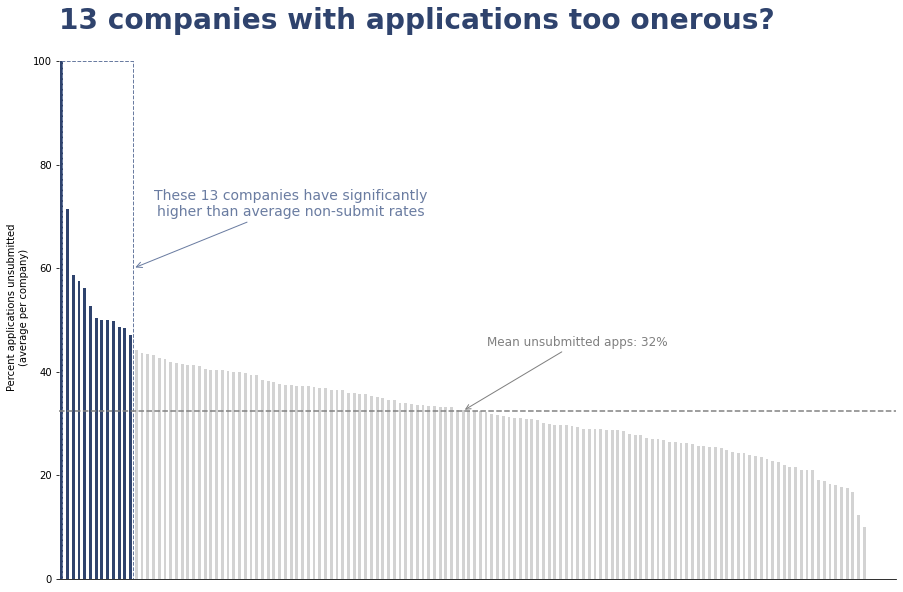

In [436]:
colors = ['#2f436d' if x in range(13) else 'lightgray' for x in range(len(df_gb_company))]

fig, ax = plt.subplots(figsize=(15, 10))
df_gb_company.plot(
    x='company_id',
    y='percent_unsubmitted',
    kind='bar',
    ax=ax,
    color=colors,
    legend=False
)

ax.set_ylabel('Percent applications unsubmitted\n(average per company)')
ax.set_xticks([])
ax.set_xlabel('')
ax.set_title(
    '13 companies with applications too onerous?',
    fontdict={
        'weight': 'bold',
        'size': 28,
        'color': '#2f436d'
    },
    loc='left'
)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axhline(
    y=df_gb_company['percent_unsubmitted'].mean(),
    linestyle='--',
    color='gray'
)
ax.annotate(
    text=f'Mean unsubmitted apps: {round(df_gb_company["percent_unsubmitted"].mean())}%',
    xy=(70, df_gb_company['percent_unsubmitted'].mean()),
    xytext=(90, 45),
    color='gray',
    ha='center',
    size=12,
    arrowprops={
        'arrowstyle': "->",
        'color': 'gray'
    }
)
rect = patches.Rectangle(
    xy=(0,0),
    width=12.5,
    height=100,
    facecolor='None',
    ls='--',
    edgecolor='#6a7ca1'
)
ax.add_patch(rect)
ax.annotate(
    text='These 13 companies have significantly\nhigher than average non-submit rates',
    xy=(12.5, 60),
    xytext=(40, 70),
    color='#6a7ca1',
    ha='center',
    size=14,
    arrowprops={
        'arrowstyle': "->",
        'color': '#6a7ca1'
    }
)
plt.savefig('sample_viz.png')